# Diffusivity - 11032021 - 11

![](data\project_z_max_11032021_11.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import trackpy as tp
from skimage import io
from corrLib import readdata, xy_bin
from xiaolei.chain.tracking import gauss1
from scipy.optimize import curve_fit
from myImageLib import bestcolor, dirrec
from utils import *
import dufte
plt.style.use('default')
from scipy.signal import savgol_filter
from IPython.display import clear_output

## Sparce trajectory analysis

In [2]:
folder = r'C:\Users\liuzy\Documents\Data\DE\11032021\Analysis\11'
traj = pd.read_csv(os.path.join(folder, 'traj_50.csv'))
t = traj.assign(frame=traj.index, particle=0)
msd = tp.msd(t, mpp=0.33, fps=1, max_lagtime=100)

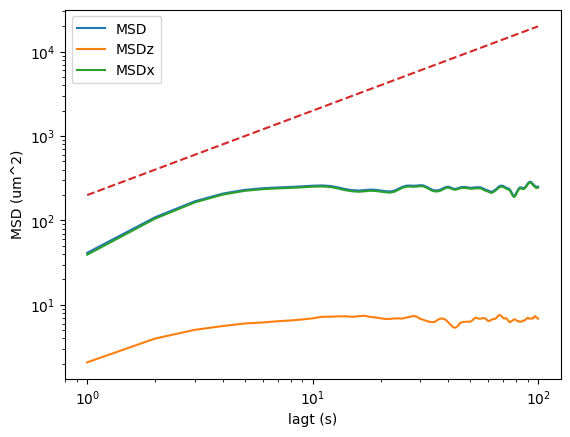

In [3]:
plt.plot(msd.lagt, msd.msd, label='MSD')
plt.plot(msd.lagt, msd['<x^2>'], label='MSDz')
plt.plot(msd.lagt, msd['<y^2>'], label='MSDx')
plt.loglog()
plt.plot(msd.lagt, 200*msd.lagt, ls='--')
plt.xlabel('lagt (s)')
plt.ylabel('MSD (um^2)')
plt.legend()

**Comments:** the MSD obtained from 600 points look ok. 600 more can potentially complete the short time regime. 

In [4]:
traj = pd.read_csv(os.path.join(folder, 'traj_1.csv'))
t = traj.assign(frame=traj.index, particle=0)

In [5]:
msd = tp.msd(t, fps=50, mpp=0.33, max_lagtime=3000)

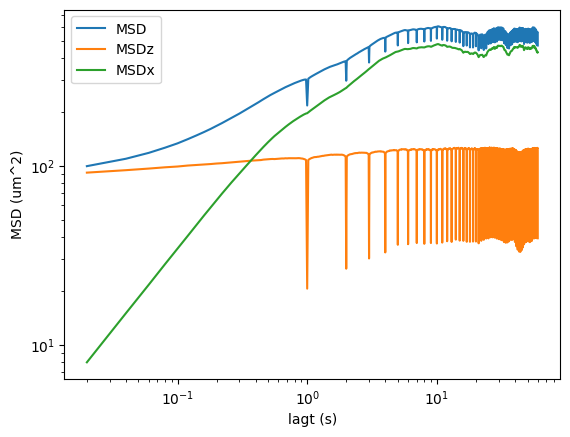

In [6]:
plt.plot(msd.lagt, msd.msd, label='MSD')
plt.plot(msd.lagt, msd['<x^2>'], label='MSDz')
plt.plot(msd.lagt, msd['<y^2>'], label='MSDx')
plt.loglog()
# plt.plot(msd.lagt, 200*msd.lagt, ls='--')
plt.xlabel('lagt (s)')
plt.ylabel('MSD (um^2)')
plt.legend()
# plt.xlim([0, 1])

In [7]:
t['x'] = savgol_filter(t['x'], 5, 3)
t['y'] = savgol_filter(t['y'], 5, 3)

In [8]:
msd = tp.msd(t, fps=50, mpp=0.33, max_lagtime=3000)

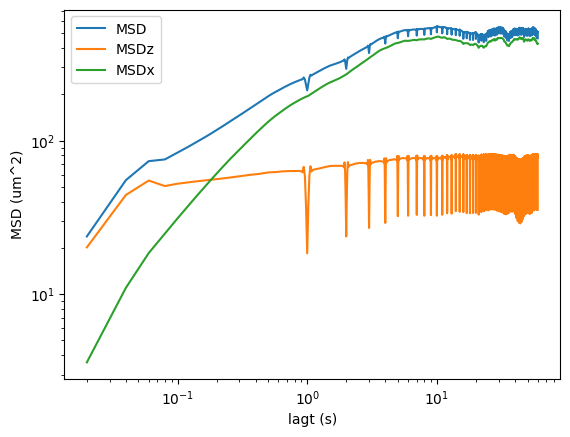

In [9]:
plt.plot(msd.lagt, msd.msd, label='MSD')
plt.plot(msd.lagt, msd['<x^2>'], label='MSDz')
plt.plot(msd.lagt, msd['<y^2>'], label='MSDx')
plt.loglog()
# plt.plot(msd.lagt, 200*msd.lagt, ls='--')
plt.xlabel('lagt (s)')
plt.ylabel('MSD (um^2)')
plt.legend()
# plt.xlim([0, 1])

In [10]:
image_folder = r'C:\Users\liuzy\Documents\Data\DE\11032021\11'
l = readdata(image_folder, 'tif')
save_folder = os.path.join(folder, 'tracking_quality')
if os.path.exists(save_folder) == False:
    os.makedirs(save_folder)
for num, i in l[25::50].iterrows():
    img = io.imread(i.Dir)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.imshow(img, cmap='gray')
    ax.scatter(t.x[num], t.y[num])
#     plt.pause(.5)
    clear_output(wait=True)
    fig.savefig(os.path.join(save_folder, i.Name+'.jpg'), dpi=50)
    plt.close()
    